# Review

I know this stuff is dry and you probably feel like tired and a bit confused - but you are all doing great!!!

# ANOVA

The analysis of variance (ANOVA) can be thought of as an extension to the t-test. The independent t-test is used to compare the means of a condition between 2 groups. ANOVA is used when one wants to compare the means of a condition between 2+ groups. ANOVA tests the data as a whole. Another way to say that is this, ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell one where the difference is if the there is one. To find out where the difference is between the groups, one has to conduct post-hoc tests.

## Assumptions

There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:

1 - Normality - 
Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality

2 - Homogeneity of variance - 
Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation

3 - Independent observations

## Lets Try an Example

### Question:

#### Which Drug dosage improve sleep the best?

In [1]:
# our groups: 
High_dose = [25,30,28,36,29]
Medium_dose = [45,55,29,56,40]
Low_dose = [30,29,33,37,27]
Placebo = [54,60,51,62,73]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1 = np.array([High_dose,Medium_dose,Low_dose,Placebo])
df = pd.DataFrame(data=data1.transpose(), columns = ['High_dose','Medium_dose','Low_dose','Placebo'])

   High_dose  Medium_dose  Low_dose  Placebo
0         25           45        30       54
1         30           55        29       60
2         28           29        33       51
3         36           56        37       62
4         29           40        27       73


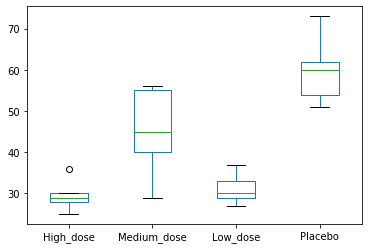

In [3]:
print(df)
df.boxplot(column = ['High_dose','Medium_dose','Low_dose','Placebo'], grid=False)
plt.show()

Looking at our sample, we could say that sleep times range from ~20 minutes to ~75 minutes. If we ignore the information about the type, the best estimation we could give for a sleeptime for the drug would be between ~20 and ~75 minutes. Let’s for now call this total variation.

The next step is to split this total variation in two: Between-Group Variation and Within-Group Variation

Between-Group Variation is Explained by our drug type:

If we add the variable company in the graph, we see that if we know which drug is taken, we can give a more precise range of sleep times.

If Drug A is taken, it takes between ~20 and ~35 minutes. 

If Drug B is taken, it takes between ~30 and ~55 minutes.

If Drug C is taken, it takes between ~25 and ~35 minutes.

If Placebo is taken, it takes between ~50 and ~75 minutes.


This phenomenon is due to the Between-Group variation: a quantification of the variation explained by our variable.

Within-Group Variation is not Explained by our drug type:

However, there is also some part of variation that cannot be explained by our variable ‘Drug’: It refers to variations caused by differences within individual groups (or levels). In other words, not all the values within each group (e.g. means) are the same.

Since we do not have those new variables, the variation remains unexplained and is called the within-group variation.

### Sum of Squares

Sum of Squares Total
Let’s get to the action! What I described before as variation is mathematically measured by the Sum of Squares,

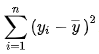

## Sum of Squares Residual

The computation for residual Sum of Squares is slightly different because it takes not the overall average, but the four group averages.

## Sum of Squares Explained

Having computed the total sum of squares and the residual sum of squares, we can now compute the Explained Sum of Squares using:


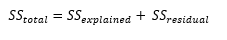


## Degrees of freedom

We need them in further computation:

df1 = df of the explained part = number of groups — 1
df2 = df of the residual = number of observations — number of groups

In our example, df1 = 3 and df2 = 21.


## Mean Squares

The statistical test that is central in ANOVA is the F-test. The null hypothesis states that the mean of all groups is equal, which implies that our model has no explanatory value and that we don’t have proof for choosing one drug over another.

The alternative hypothesis states that at least one of the means is different, which would be a reason to go more in-depth and find out which drug works better?

We compute the Mean Squares as follows:

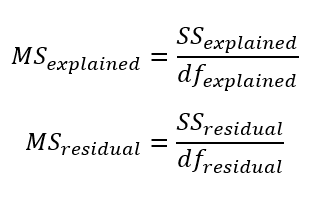

## F Statistic

We use the Mean Squares to compute the F statistic as the ratio between explained vs unexplained variation:


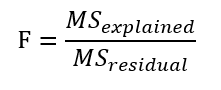

In [4]:
### lets calculate the means and see what we get here...
print(data1)
print("The group means are: Drug A ", np.mean(data1,1)[0]," Drug B: ", np.mean(data1,1)[1], ", Drug C: ", np.mean(data1,1)[2], ", Placebo: ", np.mean(data1,1)[3])


[[25 30 28 36 29]
 [45 55 29 56 40]
 [30 29 33 37 27]
 [54 60 51 62 73]]
The group means are: Drug A  29.6  Drug B:  45.0 , Drug C:  31.2 , Placebo:  60.0


In [5]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['High_dose'], df['Medium_dose'], df['Low_dose'], df['Placebo'])
print("The f-Value is: ", fvalue, " The p-value is: ", pvalue)

The f-Value is:  17.492810457516338  The p-value is:  2.639241146210922e-05


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
data_vals = (data1).reshape(-1,1)[:,0]
# print(data_vals)
data_heads = ['Drug A']*5+['Drug B']*5+['Drug C']*5+['Placebo']*5
data_tot = [[data_heads[num] , i ]for num,i in enumerate(data_vals)]

df_data = pd.DataFrame(data_tot, columns= ['Drug','SleepTime'])

lm = ols('SleepTime ~ Drug',data=df_data).fit()
table = sm.stats.anova_lm(lm) # Type 2 ANOVA DataFrame
print(table)



            df   sum_sq   mean_sq         F    PR(>F)
Drug       3.0  3010.95  1003.650  17.49281  0.000026
Residual  16.0   918.00    57.375       NaN       NaN


## So we know that there is a difference here but where??

#### So the question is: Which one do we pick???



## Post-Hoc Testing

This is where post-hoc testing comes in:

And there are a variety of post-hoc tests, Tukeys, Fisher's Least Significant Difference Test

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = pairwise_tukeyhsd(df_data['SleepTime'],df_data['Drug'])
mc_results = mc.summary()
print(mc_results)



 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1  group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
Drug A  Drug B     15.4 0.0251   1.6929 29.1071   True
Drug A  Drug C      1.6    0.9 -12.1071 15.3071  False
Drug A Placebo     30.4  0.001  16.6929 44.1071   True
Drug B  Drug C    -13.8 0.0482 -27.5071 -0.0929   True
Drug B Placebo     15.0 0.0296   1.2929 28.7071   True
Drug C Placebo     28.8  0.001  15.0929 42.5071   True
------------------------------------------------------


## CALCULATING MODEL EFFECT SIZE

Something that is useful is the effect size. The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta squared, and omega squared. Omega squared is considered a better measure of effect size than eta squared because it is unbiased in it’s calculation.

The effect size does not replace the results of a statistical hypothesis test. Instead, the effect size complements the test. Ideally, the results of both the hypothesis test and the effect size calculation would be presented side-by-side.

Hypothesis Test: Quantify the likelihood of observing the data given an assumption (null hypothesis).
Effect Size: Quantify the size of the effect assuming that the effect is present


In [8]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
Drug,3010.95,3.0,1003.650,17.49281,0.000026,0.76635,0.712141
Residual,918.00,16.0,57.375,NaN,NaN,NaN,NaN


That means the current model accounts for 70-76% of the variance in contributing to drug. Like just mentioned, within the ANOVA framework, R2 is also called eta squared, and can be interpreted as the amount of explained variance, as well as an effect size measure.

## Other Types of ANOVAs


Repeated Measures ANOVA and 1 and 2 ways:


In [9]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

df = pd.read_csv('/Users/josephnashed/Cook Share Dropbox/Joseph Nashed/NSCI Teaching/Lectures/Lectures1/Figures/rmAOV1way.csv')

aovrm = AnovaRM(df, 'rt', 'Sub_id', within=['cond'])
res = aovrm.fit()
print(res.summary())

FileNotFoundError: [Errno 2] File b'/Users/josephnashed/Cook Share Dropbox/Joseph Nashed/NSCI Teaching/Lectures/Lectures1/Figures/rmAOV1way.csv' does not exist: b'/Users/josephnashed/Cook Share Dropbox/Joseph Nashed/NSCI Teaching/Lectures/Lectures1/Figures/rmAOV1way.csv'

In [ ]:
df2way = pd.read_csv('/Users/josephnashed/Cook Share Dropbox/Joseph Nashed/NSCI Teaching/Lectures/Lectures1/Figures/rmAOV2way.csv')
aovrm2way = AnovaRM(df2way, 'rt', 'Sub_id', within=['iv1', 'iv2'])
res2way = aovrm2way.fit()

print(res2way)

## Factorial Design ANOVA

Factor A x Factor B interactions:

H0 : there is not interaction
Ha : there is an interaction

Main effect of factor A:

H0 : ?1 = ?2
Ha : Not all of the means (?) are equal

Main effect of factor B:

H0 : ?1 = ?2
Ha : Not all of the means (?) are equal



I know what you are thinking about this stuff: This is confusing....but we will walk through it!



This data is fictional; a study was conducted to test the effect of 2 new fertilizers, and the amount of water on the mean crop yield. 

### An Example:

In [ ]:
import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp



df = pandas.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

In [ ]:
rp.summary_cont(df['Yield'])

In [ ]:
rp.summary_cont(df.groupby(['Fert']))['Yield']

In [ ]:
rp.summary_cont(df.groupby(['Fert', 'Water']))['Yield']

In [ ]:
    # Fits the model with the interaction term
    # This will also automatically include the main effects for each factor
    model = ols('Yield ~ C(Fert)*C(Water)', df).fit()

    # Seeing if the overall model is significant
    print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

In [ ]:
model.summary()

In [ ]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

The interaction term is not significant. This indicates that there is no interaction effect between the type of fertilizer and the amount of water on the mean crop yield. Since this is not significant, the interaction term is to be removed from the model and it needs to be re-ran so we can look at the main effects of each factor independently.

In [ ]:
# Fits the model
model2 = ols('Yield ~ C(Fert)+ C(Water)', df).fit()

print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

In [ ]:
model2.summary()

# Multiple Regression

Multiple Linear Regression attempts to model the Relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple linear Regression. The Difference Lies in the Evalution. We can use it to find out which factor has the highest impact on the predicted output and now different variable relate to each other.

Here : Y= b0 + b1*x1 + b2*x2 + b3*x3 +…… bn*xn 

Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables

Assumption of Regression Model :

Linearity: The relationship between dependent and independent variables should be linear.

Homoscedasticity: Constant variance of the errors should be maintained.

Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.

Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.


In [ ]:
import pandas as pd

# Read the csv file.
df=pd.read_csv('/Users/josephnashed/Cook Share Dropbox/Joseph Nashed/NSCI Teaching/Lectures/Lectures1/Figures/multiple-linear-regression-dataset.csv')

# Print the first 5 rows of the data set.
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
mlr= LinearRegression()

# Fit linear regression.
mlr.fit(df[['deneyim','maas']], df['yas'])


In [ ]:
print(mlr.intercept_)

print(mlr.coef_)



Multiple linear regression uses a linear function to predict the value of a dependent variable containing the function n independent variables.



## Non-Parametric Tests

Not all Data is normally disritbuted, or even conforms to the simple assumptions we've made!


So how do we overcome this - we need statistical tests to help us test things EVEN if those assumptions aren't met

Althought there are MANY non-parametric tests: the three main ones I will go over include:


The Mann-Whitney U test for comparing independent data samples: the nonparametric version of the Student t-test.

The Wilcoxon signed-rank test for comparing paired data samples: the nonparametric version of the paired Student t-test.

The Kruskal-Wallis H and Friedman tests for comparing more than two data samples: the nonparametric version of the ANOVA and repeated measures ANOVA tests.

Often, they refer to statistical methods that do not assume a Gaussian distribution. They were developed for use with ordinal or interval data, but in practice can also be used with a ranking of real-valued observations in a data sample rather than on the observation values themselves.

A common question about two or more datasets is whether they are different. Specifically, whether the difference between their central tendency (e.g. mean or median) is statistically significant.



p <= alpha: reject H0, different distribution.

p > alpha: fail to reject H0, same distribution.

## Mann-Whitney Test


The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The test was named for Henry Mann and Donald Whitney, although it is sometimes called the Wilcoxon-Mann-Whitney test, also named for Frank Wilcoxon, who also developed a variation of the test.

The two samples are combined and rank ordered together. The strategy is to determine if the values from the two samples are randomly mixed in the rank ordering or if they are clustered at opposite ends when combined. A random rank order would mean that the two samples are not different, while a cluster of one sample values would indicate a difference between them

In [ ]:
# generate gaussian data samples
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

## Wilcoxon Signed-Rank Test

In some cases, the data samples may be paired.

There are many reasons why this may be the case, for example, the samples are related or matched in some way or represent two measurements of the same technique. More specifically, each sample is independent, but comes from the same population.

Examples of paired samples in machine learning might be the same algorithm evaluated on different datasets or different algorithms evaluated on exactly the same training and test data.

The samples are not independent, therefore the Mann-Whitney U test cannot be used. Instead, the Wilcoxon signed-rank test is used, also called the Wilcoxon T test, named for Frank Wilcoxon. It is the equivalent of the paired Student T-test, but for ranked data instead of real valued data with a Gaussian distribution.

The Wilcoxon signed ranks test is a nonparametric statistical procedure for comparing two samples that are paired, or related. The parametric equivalent to the Wilcoxon signed ranks test goes by names such as the Student’s t-test, t-test for matched pairs, t-test for paired samples, or t-test for dependent samples.

In [ ]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

## Kruskal-Wallis H Test

When working with significance tests, such as Mann-Whitney U and the Wilcoxon signed-rank tests, comparisons between data samples must be performed pair-wise.

This can be inefficient if you have many data samples and you are only interested in whether two or more samples have a different distribution.

The Kruskal-Wallis test is a nonparametric version of the one-way analysis of variance test or ANOVA for short. It is named for the developers of the method, William Kruskal and Wilson Wallis. This test can be used to determine whether more than two independent samples have a different distribution. It can be thought of as the generalization of the Mann-Whitney U test.

The default assumption or the null hypothesis is that all data samples were drawn from the same distribution. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much.

When the Kruskal-Wallis H-test leads to significant results, then at least one of the samples is different from the other samples. However, the test does not identify where the difference(s) occur. Moreover, it does not identify how many differences occur. To identify the particular differences between sample pairs, a researcher might use sample contrasts, or post hoc tests, to analyze the specific sample pairs for significant difference(s). The Mann-Whitney U-test is a useful method for performing sample contrasts between individual sample sets.

In [ ]:

# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

## Friedman Test

As in the previous example, we may have more than two different samples and an interest in whether all samples have the same distribution or not.

If the samples are paired in some way, such as repeated measures, then the Kruskal-Wallis H test would not be appropriate. Instead, the Friedman test can be used, named for Milton Friedman.

The Friedman test is the nonparametric version of the repeated measures analysis of variance test, or repeated measures ANOVA. The test can be thought of as a generalization of the Kruskal-Wallis H Test to more than two samples.

The default assumption, or null hypothesis, is that the multiple paired samples have the same distribution. A rejection of the null hypothesis indicates that one or more of the paired samples has a different distribution.

Fail to Reject H0: Paired sample distributions are equal.
Reject H0: Paired sample distributions are not equal.
The test assumes two or more paired data samples with 10 or more samples per group.

The Friedman test is a nonparametric statistical procedure for comparing more than two samples that are related. The parametric equivalent to this test is the repeated measures analysis of variance (ANOVA). When the Friedman test leads to significant results, at least one of the samples is different from the other samples.

In [ ]:
# Friedman test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')